In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

Duplicate key in file PosixPath('/Users/katoutakaaki/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [18]:
train['Cabin'].head(30)

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
Name: Cabin, dtype: object

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


ValueError: Cannot pass values for both `x` and `y`

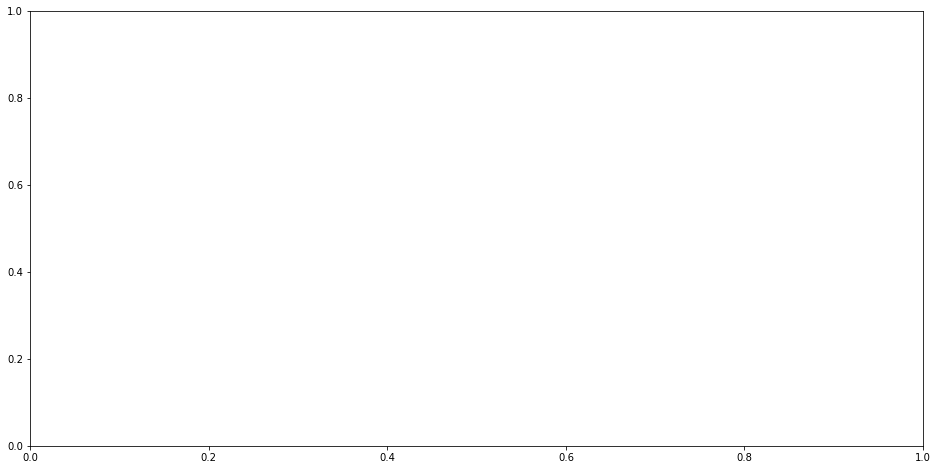

In [26]:
var = 'Sex'
data = pd.concat([train['Survived'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.countplot(x=var, y="Survived", data=data)
fig.axis(ymin=0, ymax=2100);
plt.xticks(rotation=90);

In [27]:
!pip install optuna

In [28]:
import numpy as np 
import pandas as pd 

# 前処理用ライブラリ
from sklearn.preprocessing import StandardScaler

# パラメータチューニング用ライブラリ Optuna
import optuna
from optuna.samplers import TPESampler
# ログがうるさいのできる
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 機械学習ライブラリ
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score

# Warningがうるさいのできる
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
# データセットの読み込み
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 目的変数の処理
train_y = train_df['Survived']
test_df['Survived'] = np.nan

In [30]:
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'

In [31]:
all_df = pd.concat([train_df, test_df])

In [32]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  dataset      1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [33]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dataset           0
dtype: int64

In [34]:
all_df['Sex'] = all_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [35]:
# 敬称を抜き出す。
all_df['Honorific'] = all_df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
#数の少ない敬称を近しいものに統合
all_df['Honorific'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer', inplace=True)
all_df['Honorific'].replace(['Don', 'Sir',  'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
all_df['Honorific'].replace(['Mme', 'Ms'], 'Mrs', inplace=True)
all_df['Honorific'].replace(['Mlle'], 'Miss', inplace=True)
all_df['Honorific'].replace(['Jonkheer'], 'Master', inplace=True)

In [36]:
train_df['AgeIsnull'] = train_df['Age'].isnull().apply(lambda x: 1 if x == True else 0)
print(pd.crosstab(train_df['Survived'],train_df['AgeIsnull'] ))
print('年齢わかる人の死亡率 59% ,年齢不明の人の死亡率 70%')

AgeIsnull    0    1
Survived           
0          424  125
1          290   52
年齢わかる人の死亡率 59% ,年齢不明の人の死亡率 70%


In [37]:
# 年齢の欠損フラグ
all_df['AgeIsnull'] = all_df['Age'].isnull().apply(lambda x: 1 if x == True else 0)

# 年齢の欠損を同じ敬称の年齢の中央値で埋める。 「Mr.」なら「Mr.」の中の中央値
honorific_dict = all_df['Honorific'].value_counts().to_dict()
age_median_dict = {}
for honorific in honorific_dict.keys():
    age_median_dict[honorific] = all_df[all_df['Honorific']==honorific]['Age'].median()
    
for honorific in age_median_dict.keys():
    all_df['Age'] = all_df.loc[((all_df['Age'].isnull()) & (all_df['Honorific']==honorific)),'Age'] = age_median_dict[honorific]

# 年齢帯ごとに分ける。 0：子供 1：高齢者ではない大人 2:高齢者
all_df['AgeBin'] = 1
all_df.loc[all_df['Age']<18,'AgeBin'] = 0
all_df.loc[all_df['Age']>=60,'AgeBin'] = 2

In [38]:
# 家族の人数を計算
all_df['FamilyNum'] = all_df['SibSp'] + all_df['Parch'] + 1

# 家族の人数ごとにカテゴリ変数化
def family_size_case(x):
    if  x == 1:
        return 'Alone'
    elif x >= 2 and x <= 4:
        return 'Small Family'
    elif x >= 5 and x <= 6:
        return 'Midium Family'
    else:
        return 'Large Family'

all_df['FamilySize'] = all_df['FamilyNum'].apply(family_size_case)

In [39]:
# Fareがnullの人を抜き出して、同一条件の人の中央値で埋める。
fare_null_df = all_df[all_df['Fare'].isnull()]
for idx,row in fare_null_df.iterrows():
    pc = row['Pclass']
    fn = row['FamilyNum']
    all_df['Fare'] = all_df['Fare'].fillna(all_df.groupby(['Pclass', 'FamilyNum'])['Fare'].median()[pc][fn])

# 価格帯ごとに分ける。
all_df['FareBin'] = 0
all_df.loc[(all_df['Fare']>=10) & (all_df['Fare']<50), 'FareBin'] = 1
all_df.loc[(all_df['Fare']>=50) & (all_df['Fare']<100), 'FareBin'] = 2
all_df.loc[(all_df['Fare']>=100), 'FareBin'] = 3

In [40]:
all_df['EmbarkedIsnull'] = all_df['Embarked'].isnull().apply(lambda x: 1 if x == True else 0)
all_df['Embarked'] = all_df['Embarked'].fillna('S')

In [41]:
all_df['TicketNum'] = all_df.groupby('Ticket')['Ticket'].transform('count')


In [42]:
train_df['CabinIsnull'] = train_df['Cabin'].isnull().apply(lambda x: 1 if x == True else 0)
print(pd.crosstab(train_df['Survived'],train_df['CabinIsnull'] ))
print('キャビンわかる人の生存率66% キャビンわからない人の生存率 30%')
print('生きていたか家族が証言？')

CabinIsnull    0    1
Survived             
0             68  481
1            136  206
キャビンわかる人の生存率66% キャビンわからない人の生存率 30%
生きていたか家族が証言？


In [43]:
train_df['Cabin'] = train_df['Cabin'].fillna('null')
train_df['CabinDeck'] = train_df['Cabin'].str[0]
print(pd.crosstab(train_df['Survived'],train_df['CabinDeck'] ))

CabinDeck  A   B   C   D   E  F  G  T    n
Survived                                  
0          8  12  24   8   8  5  2  1  481
1          7  35  35  25  24  8  2  0  206


In [44]:
# Cabin
all_df['CabinIsnull'] = all_df['Cabin'].isnull().apply(lambda x: 1 if x == True else 0)
# all_df['Cabin'] = all_df['Cabin'].fillna('Null')
# all_df['CabinDeck'] = all_df['Cabin'].str[0]